<a href="https://colab.research.google.com/github/Mayankjain0807/AIR-BNB/blob/EDA-Projects/Hotel_booking_project_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In this kernal you will see how we used EDA and drew conclusions from the data. The content of this kernel include:

1.<b> Understading the data:</b> A brief exploration of all the variables and their relationships

2.<b> Data Cleaning:</b> Checking for missing values, handling NANs.

3.<b> Visualising data:</b> With the help of different plots, see what the data tells.

4.<b> Drawing Conclusions:</b> Understanding what are the causes of the problem statement.

# Also we will answer some few questions:

## Q1. How many booking were cancelled in both type of hotels ?

## Q2. Which month is the most occupied and which is the least occupied?

## Q3. From which country most guests are coming?

## Q4. What are the number of weekend vs weekdays night bookings for resort hotels?

## Q5. Which months have cheaper booking rates?

## Q6. How many number of customers repeated their bookings?

## Q7. Which is the most booked accomodation type?

## Q8. What are the number of bookings made by different market segment?

## Q9. How does lead time affect cancellation?

## Q10. How does deposit type affect cancelation?

## Q11. How does ADR affect cancelation?

# 1. Understanding the data

First let me import python libraries which will help us a lot through this journey.

<b>Numpy</b> is a library to do high end calculations.

<b>Pandas</b> is a library to help work with dataframes.

<b>Matplotlib and Seaborn</b> are here to help visualize our data.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset and storing it in dataframe
from google.colab import files
hotel_data = files.upload()

Saving Hotel Bookings.csv to Hotel Bookings.csv


In [3]:
# Dataset First Look
import io
df = pd.read_csv(io.BytesIO(hotel_data['Hotel Bookings.csv']))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Printing shape of dataframe

df.shape

(119390, 32)

In [ ]:
# List of columns present in dataset

list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

The dataset spans over three years - 2015, 2016 and 2017.
1. **‘hotel’ :** Denotes the type of hotel - Resort hotel or city hotel.
2. **‘Is_canceled’:**  Denoted by ‘1’ if booking was cancelled or ‘0’ if booking was not cancelled.
3. **‘Lead_time’ :** Period between time of booking and checking in (considered in days here).
4. **‘arrival_date_month’ :** The month when customer arrived at the hotel.
5. **‘country’:** The country of origin of the customer; has 158 countries listed.
6. **‘Days_in_waiting_list’ :** Number of days the booking was in the waiting list before it was confirmed to the customer.
7. **‘Deposit_type’ :** Indication on if the customer made a deposit to guarantee the booking. Three categories, No-deposit, Non-Refund, Refundable.
8. **‘Adr’ :** Average Daily rate as defined by the average rental revenue earned for an           occupied room per day.
9. **‘Adults, Babies, Children’ :** Number of adults, babies and children.
10. **‘Assigned Room Type’ :** Code for the type of room assigned to the booking.
11. **‘Booking Changes’ :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
12. **‘Distribution_channel’ :** Booking distribution channel.
13. **‘Is_repeated_guest’ :** Value indicating if the booking name was from a repeated guest(1) or not (0).
14. **‘Company’ :** ID of the company/entity that made the booking or responsible for paying the booking.
15. **‘Customer Type’ :**    Type of booking, assuming one of four categories: Contract – when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the bookings is not part of a group or contract, and is not associated to other transient booking; Transient party – when the booking is transient to at least other transient booking.
16. **‘Market_segment’ :** Market segment designation.
17. **‘Previous_cancellations’ :** Number of previous bookings that were cancelled by the customer prior to the current booking.
18. **‘Required_car_parking_spaces’ :** Number of car parking spaces required by the customer.
19. **‘Reservation_status’ :** Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check Out – customer has checked in but already departed; No Show – customer did not check in and did inform the hotel of the reason why.
20. **‘Reservation_status_date’ :**  Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.
21. **‘Reserved_room_type’ :** Code of room type reserved.
22. **‘Types_of_special_requests’ :** Number of special requests made by the customer(e.g. Twin bed or high floor)
23. ‘Stays_in_weekend_nights, Stays_in_week_nights’ : Number of weekend nights and week nights the guest stayed or booked to stay at the hotel.


In [ ]:
# Basic info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## There are four columns having datatype float ,sixteen having datatype int and twelve object datatype

In [ ]:
# Checking datatypes of columns
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Let's explore some columns.

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:

df['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [ ]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [ ]:
df.agent

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [ ]:
# Checking for total null values in each column

df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
# Percentage of null values in each column

print(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False))

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

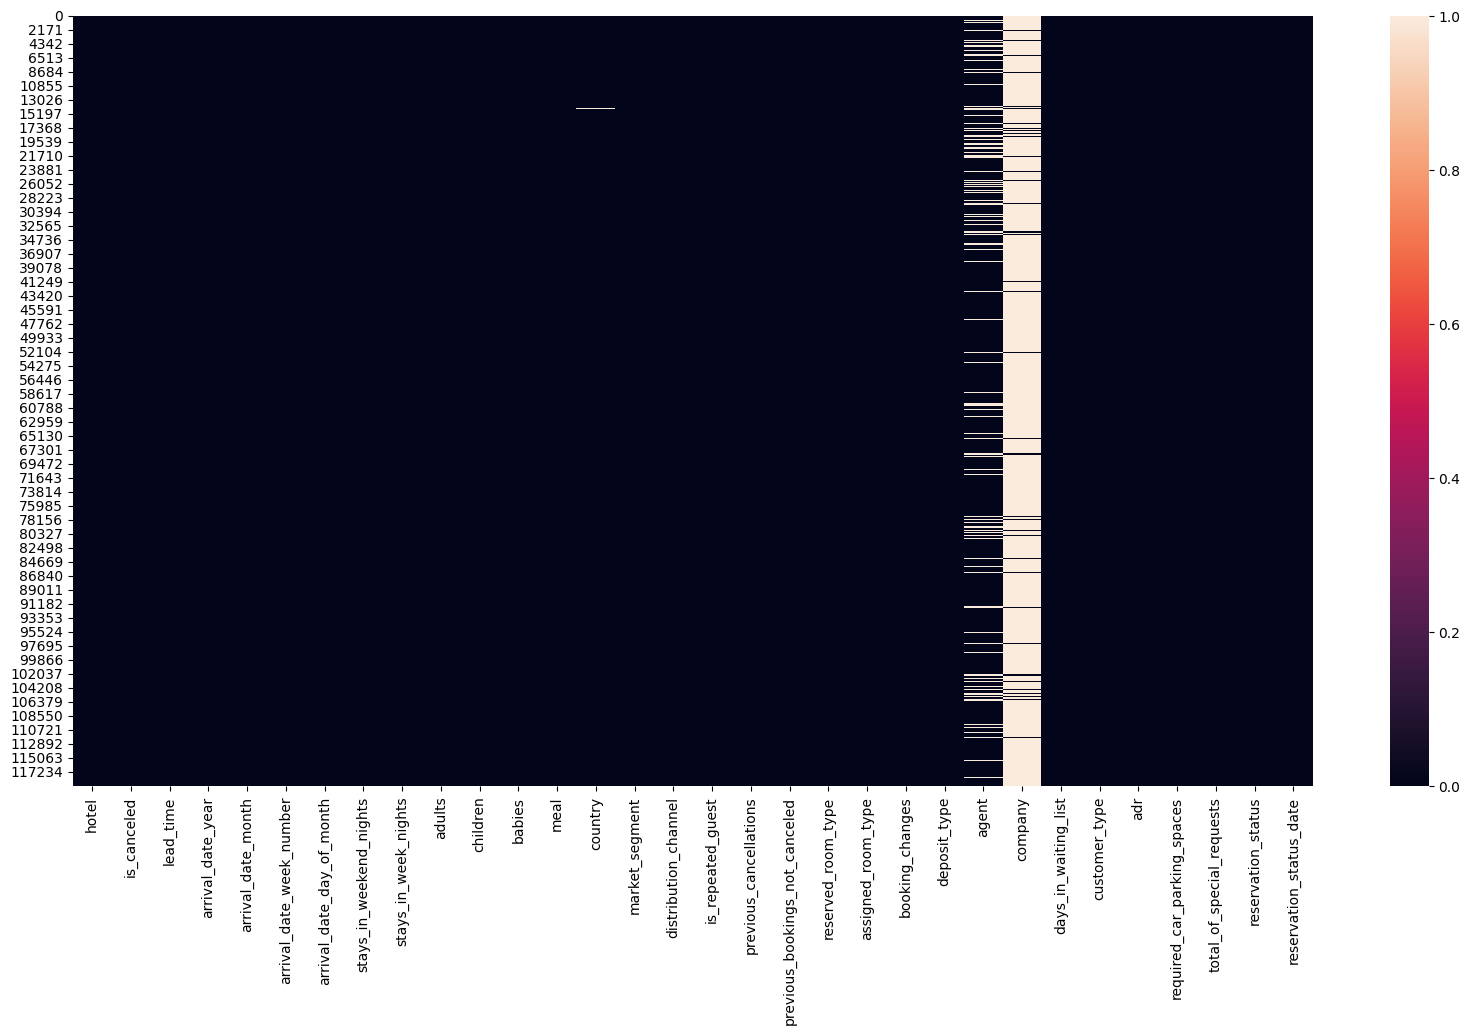

In [ ]:
# Plotting heatmap of null values

fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df.isna())
plt.show()

## Key Points:
1. Columns which contains null values are agent, company, children and country.

2. Approximately, there are 94% company column and 13% agent column filled with null values.

# 2. Data Cleaning.

In [5]:
# Before handling null values, first create a copy of original dataset.

hotel_df = df.copy()

## Columns like Agent and Company have maximum number of null values as compared to other columns and we will replace all null values with 0, because these are not missing values instead they will be considered as "Not Applicable".

In [26]:
# Lets drop the null values of column- company. This column contains 90% null values so no use of this column.

hotel_df.drop(['company'], axis =1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [22]:
# Let's handle null values.
# Replacing null values of column Agent with 0

hotel_df[['agent']] = hotel_df[['agent']].fillna(0.0)

## We will replace all missing values of column 'children' with rounded mean value as it contains the count of children.

## Then we will replace NULL values of 'country' column with mode of that column.

In [20]:
# Replace missing children values with rounded mean value

hotel_df['children'].fillna(round(df['children'].mean()), inplace = True)

In [21]:
# Replace missing values of country column with mode.

hotel_df['country'].fillna(df['country'].mode().to_string(), inplace=True)

## There are many rows that have zero guests including adults, children and babies, we need to remove those rows because they do not make any sense.

In [24]:
# Drop those rows which have adult, babies and children equals to 0

hotel_df = hotel_df.drop(df[(hotel_df.adults + hotel_df.babies + hotel_df.children)==0].index)

In [27]:
# Let's now check the shape of dataframe

hotel_df.shape

(119210, 32)

# 3. Visualising data.

In [28]:
# Descriptive statistics of dataset

hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,6768.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,189.090869,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,131.589843,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,62.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,178.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

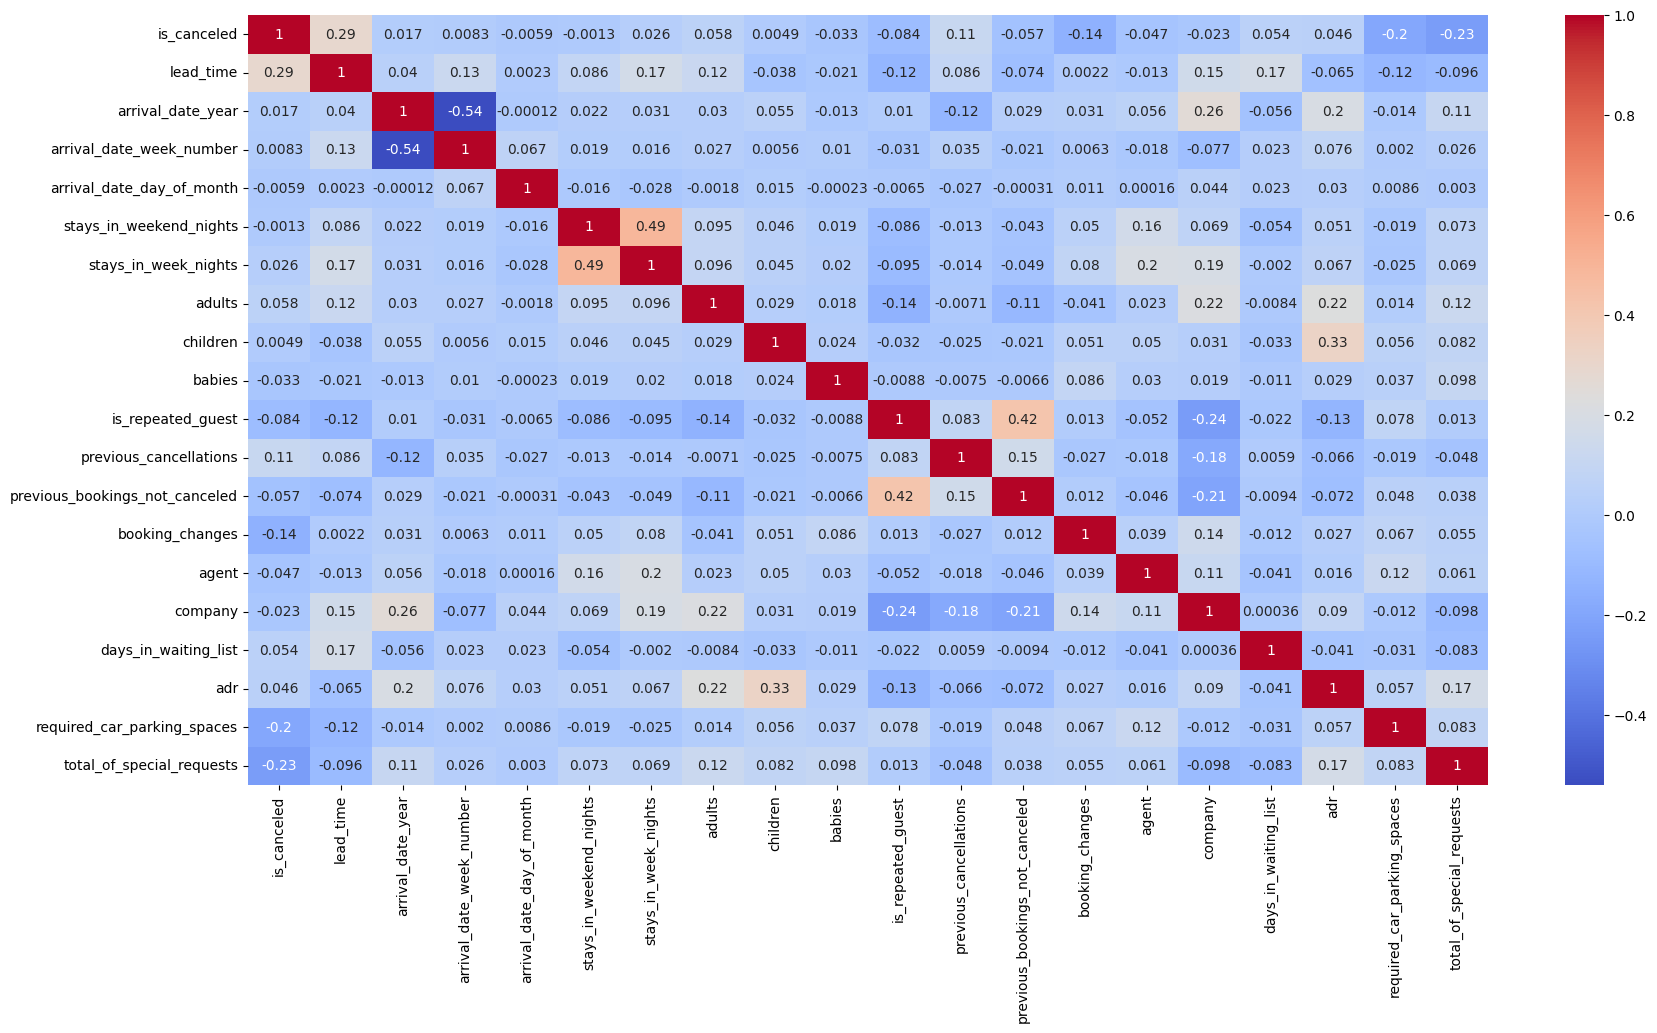

In [29]:
# Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(hotel_df.corr(), cmap="coolwarm", annot=True)

## 'is_canceled' is highly positively correlated with 'lead_time' as compared to other features.

## Let's see percentage of bookings in both hotels.

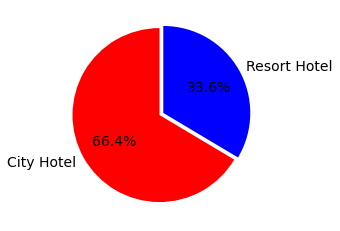

In [ ]:
# Pie plot to show types of hotels.

labels = hotel_df['hotel'].value_counts().index.tolist()
sizes = hotel_df['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['red', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

## Maximum number of bookings made in city hotel.

# Q1. How many booking were cancelled in both type of hotels ?

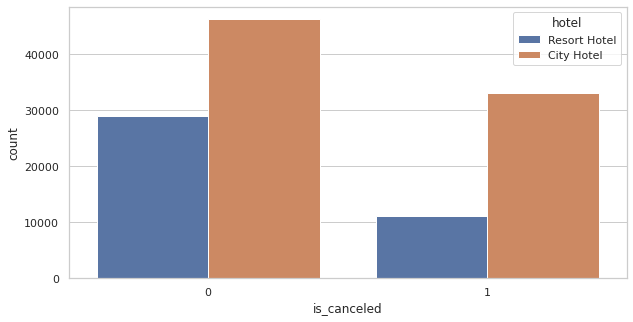

In [ ]:
# Bar plot showing count of canceled and not canceled bookings in both hotels.

plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_canceled", hue ='hotel',data=hotel_df)

## In Resort hotel, booking cancellation is less as compared  to City hotel. And overall booking cancellation is low.

# Q2. Which month is the most occupied and which is the least occupied?

In [ ]:
# value_counts counts the number of times each values has appeared

hotel_df.arrival_date_month.value_counts(normalize=True)

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64

In [6]:
month_df = hotel_df[hotel_df['is_canceled']==0]['arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})

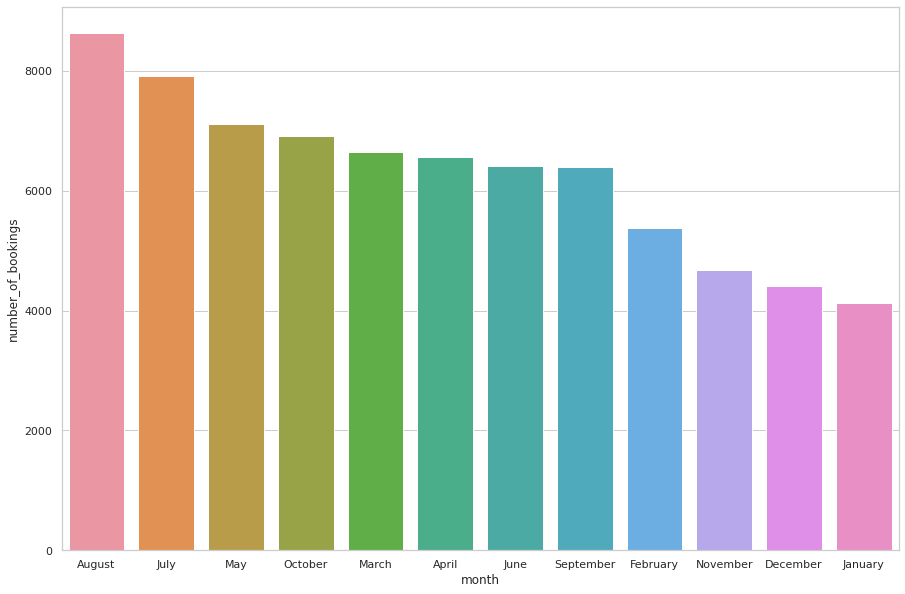

In [ ]:
# Barplot of number of bookings in each month

plt.figure(figsize=(15,10))
ax = sns.barplot(x="month", y="number_of_bookings", data = month_df)

In [16]:
month_hotel_type = hotel_df[hotel_df['is_canceled']==0].groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()

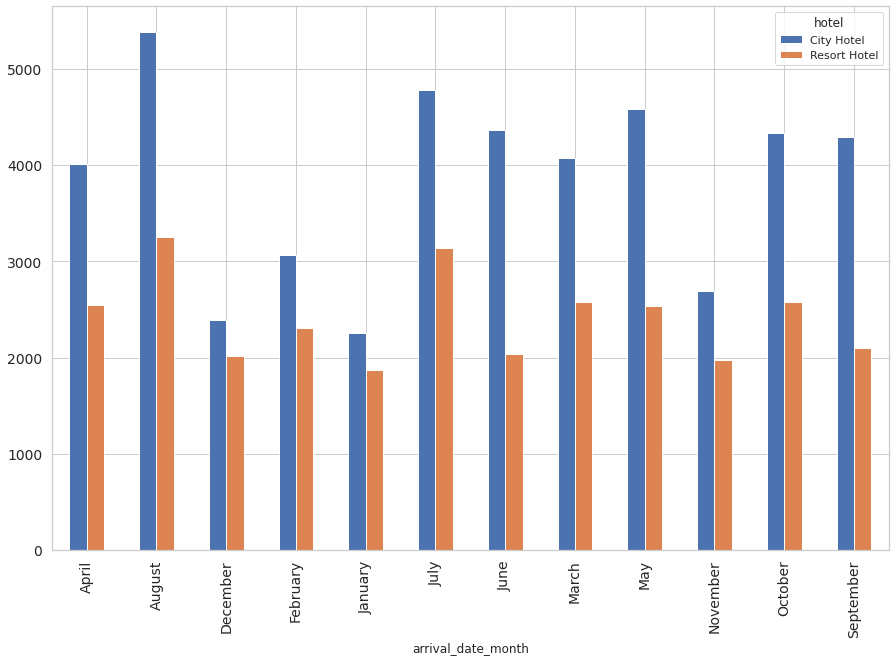

In [ ]:
# Barplot of number of bookings in each month for both hotels.

ax = month_hotel_type.plot.bar(figsize = (15,10),fontsize = 14)

## It is found that, August is the most occupied month with 11.65% bookings and January is the least occupied month with 4.94% bookings.

# Q3. From which country most guests are coming?

In [ ]:
# Value counts of top 10 countries from where maximum number of bookings happened

top_10_countries = hotel_df[hotel_df['is_canceled']==0]['country'].value_counts()[:10]

In [ ]:
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

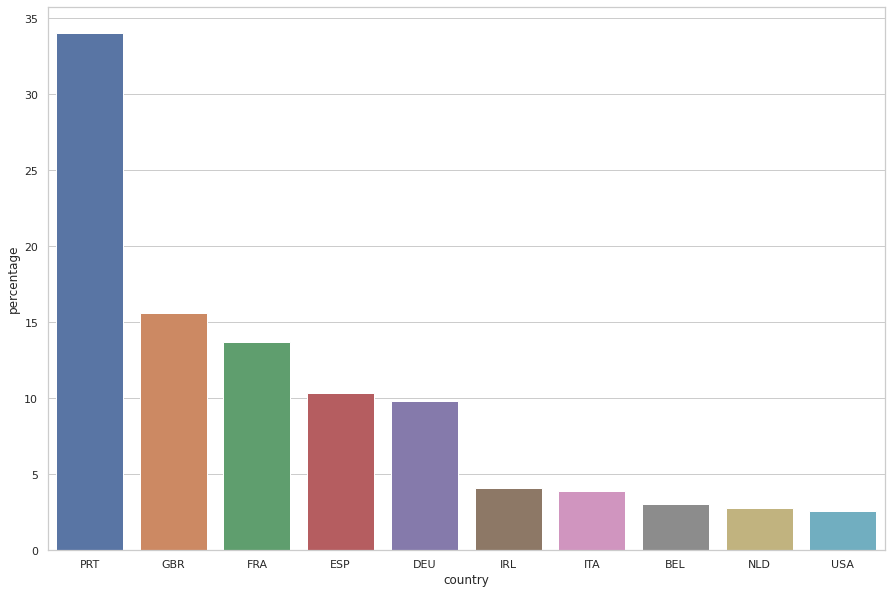

In [ ]:
# Bar plot of top 10 countries

plt.figure(figsize=(15,10))
ax = sns.barplot(x="country", y="percentage", data=top_10_countries)

## More visitors are from western europe, namely Portugal,France, Great Britain and Spain being the highest.

#Q4. What are the number of weekend vs weekdays night bookings for resort hotels?

In [ ]:
# First we will take only not cancelled booking values

not_canceled_data = hotel_df[hotel_df['is_canceled']==0]

In [ ]:
# Total number of week night stay.

week_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_week_nights'].sum()

In [ ]:
# Total number of weekend night stay.

weekend_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_weekend_nights'].sum()

Text(0.5, 1.0, 'Number of bookings for week and weekend nights for Resort type hotel')

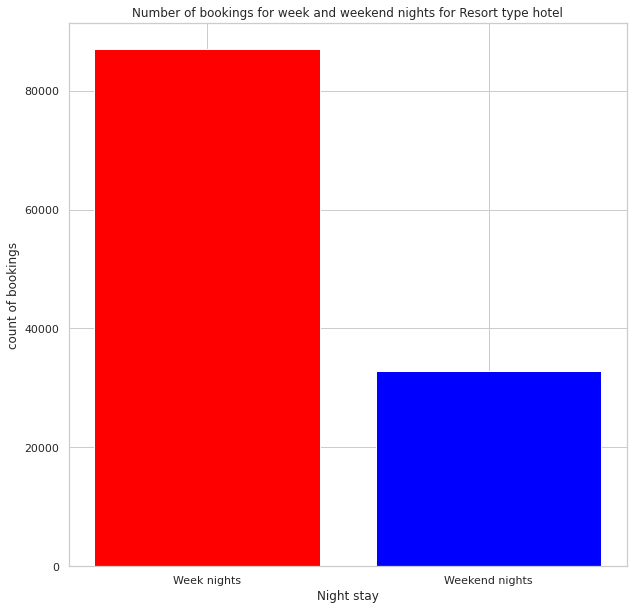

In [ ]:
# Bar plot showing week nights and weekend nights stay for Resort hotels.

plt.figure(figsize=(10,10))
plt.bar(x=['Week nights','Weekend nights'],height = [week_nights,weekend_nights], color = ['red','blue'])
plt.xlabel('Night stay')
plt.ylabel('count of bookings')
plt.title('Number of bookings for week and weekend nights for Resort type hotel')

## It is found that number of week nights stay is more as compared to weekend nights stay.

# Let's check the distribution of adr.

In [ ]:
# not_canceled dataframe that we have created earlier to get only those bookings which are not canceled.

not_canceled_data[not_canceled_data['adr'] == 0][not_canceled_data['market_segment']=='Complementary'].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,C,H,0,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,0.0,0,FB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,0.0,0,BB,AGO,Complementary,Direct,0,0,0,A,C,1,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,0.0,0,HB,PRT,Complementary,Direct,0,0,0,E,D,0,No Deposit,0.0,0.0,0,Transient,0.0,0,3,Check-Out,2015-10-17


## The adr column consist of values which are euqal to 0. However, there are few rows where we see the market segment as Complementary for all those values and it makes sense. Other than those all other values seems as an anamoly and needs to be removed.

In [ ]:
# Let's filter our copied dataset and remove anamolies.

hotel_df= hotel_df.drop(hotel_df[(hotel_df['adr'] == 0) & (hotel_df['market_segment'] != 'Complementary')].index)

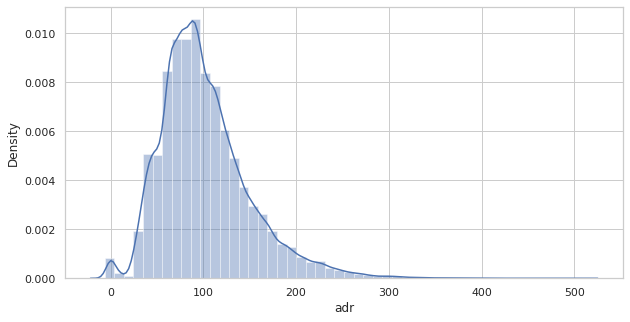

In [ ]:
# Let's check distribution of adr column.

plt.figure(figsize=(10,5))
ax = sns.distplot(hotel_df[hotel_df['is_canceled']==0]['adr'])

## The above distribution plot is a right-skewed distribution, with an average adr of 100.57. Half of the adr values are less than 93.7 and the most repeated adr value is 65.

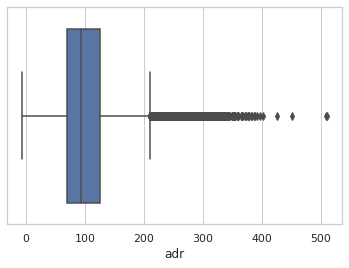

In [ ]:
# Boxplot of adr column.

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=hotel_df[hotel_df['is_canceled']==0]['adr'])

# 5. Which months have cheaper booking rates?

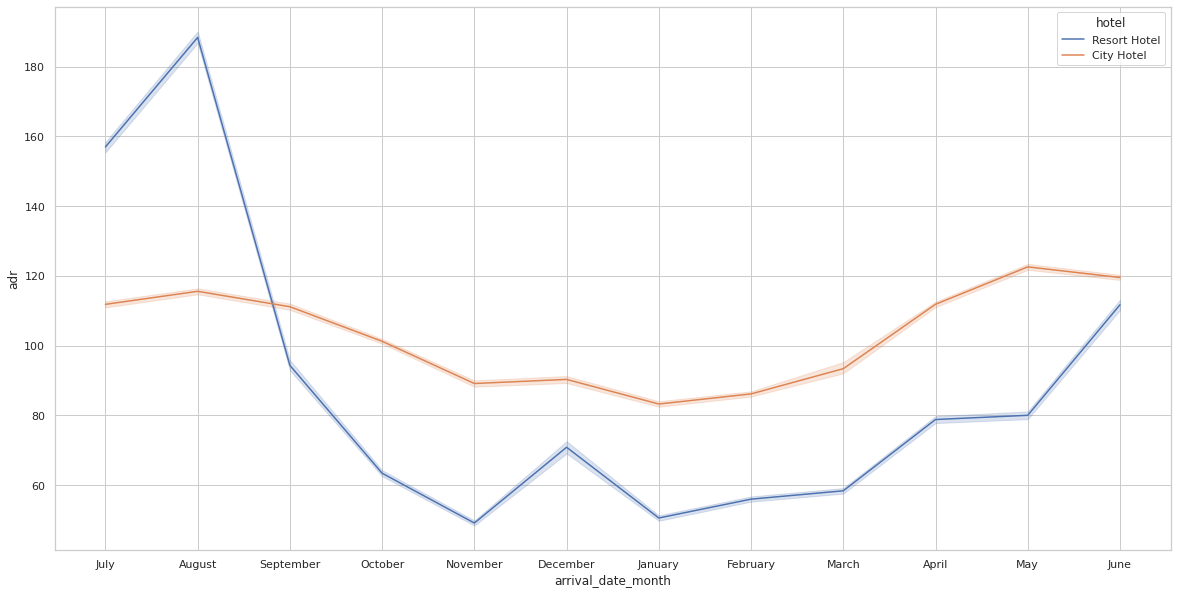

In [ ]:
# Lineplot of the adr for different hotel types.

plt.figure(figsize=(20,10))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= hotel_df)
plt.show()

## For both city and resort hotels, November to January have cheaper average daily rates.

# Q6. How many number of customers repeated their bookings?

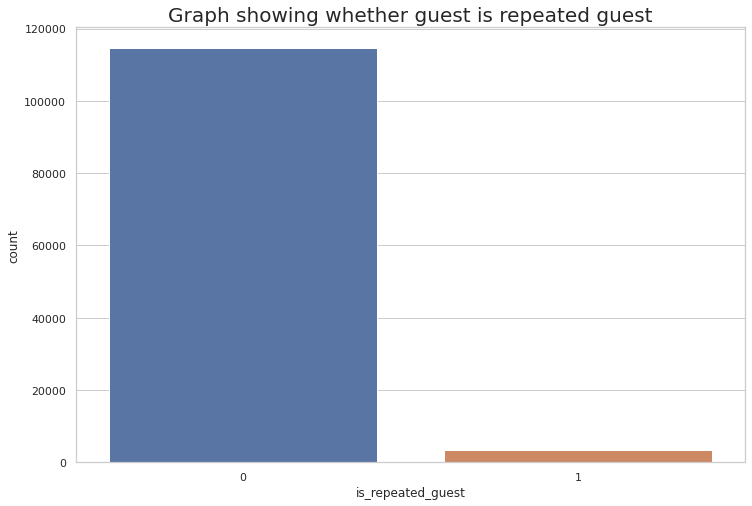

In [ ]:
# Countplot of number of customers repeated their bookings.

plt.figure(figsize=(12,8))
sns.countplot(data = hotel_df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

## It is found that number of repeating guests are very low.

# Q7. Which is the most booked accomodation type?

## We have considered a couple is a group of 2 adults and family contains people more than 2.

In [ ]:
# Filter the data on the basis of individual, couple and family.

individual = hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults']==1) & (hotel_df['children'] == 0) & (hotel_df['babies'] == 0)]
couple = hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults']==2) & (hotel_df['children'] == 0) & (hotel_df['babies'] == 0)]
family = hotel_df[hotel_df['is_canceled']==0][(hotel_df['adults'] )+ (hotel_df['children']) + (hotel_df['babies'] ) > 2]

In [ ]:
# Shape of dataset containing only not cancelled bookings.

total_count = hotel_df[(hotel_df['is_canceled']==0)].shape[0]

In [ ]:
# Calculating the percentage of booking of each type of accomodations.

percentage = [round(len(item)/total_count * 100) for item in [individual,couple,family]]

In [ ]:
types_of_accomodation = ['Individual','Couple','Family']

In [ ]:
# Dictionary to store types of accomodation and their percentage of bookings.

dict(zip(types_of_accomodation,percentage))

{'Couple': 66, 'Family': 13, 'Individual': 21}

In [ ]:
# Creating dataframe

data = pd.DataFrame({'types_of_accomodation':types_of_accomodation,'percentage':percentage})
data

,types_of_accomodation,percentage
0,Individual,21
1,Couple,66
2,Family,13


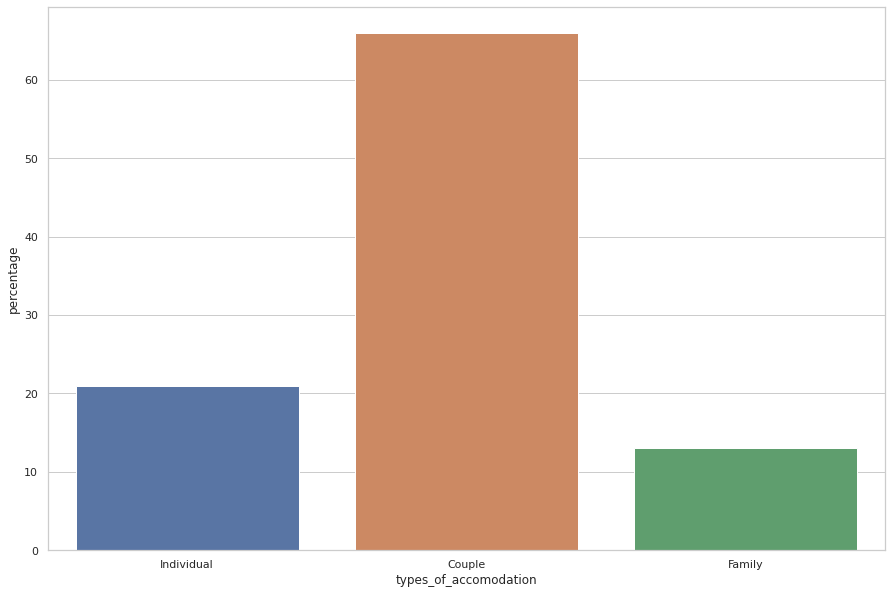

In [ ]:
# Barplot of different types of accomodations.

plt.figure(figsize=(15,10))
ax = sns.barplot(x="types_of_accomodation", y="percentage", data = data)

## Percentage of booking is high in case of 'Couple', which means maximum number of booking made by couples in both type of hotels.

# Q8. What are the number of bookings made by different market segment?

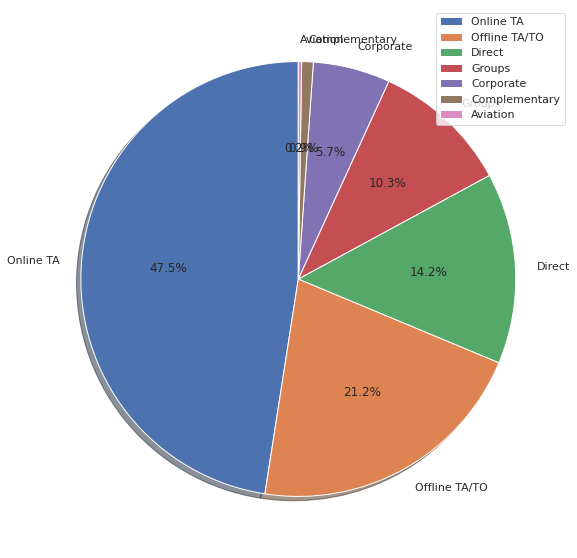

In [ ]:
# Total bookings per market segment.

plt.figure(figsize = (20,10))
segments=not_canceled_data["market_segment"].value_counts()

# pie plot

ax = plt.pie(segments,
             labels=segments.index,
             autopct='%1.1f%%',
             shadow=True, startangle=90
             )

plt.legend(ax, labels = segments.index, loc="best")

## Maximum number of bookings made by Online TA, followed by Offline TA and Direct.

# Q9. How does lead time affect cancellation?

Text(0, 0.5, 'Cancelations [%]')

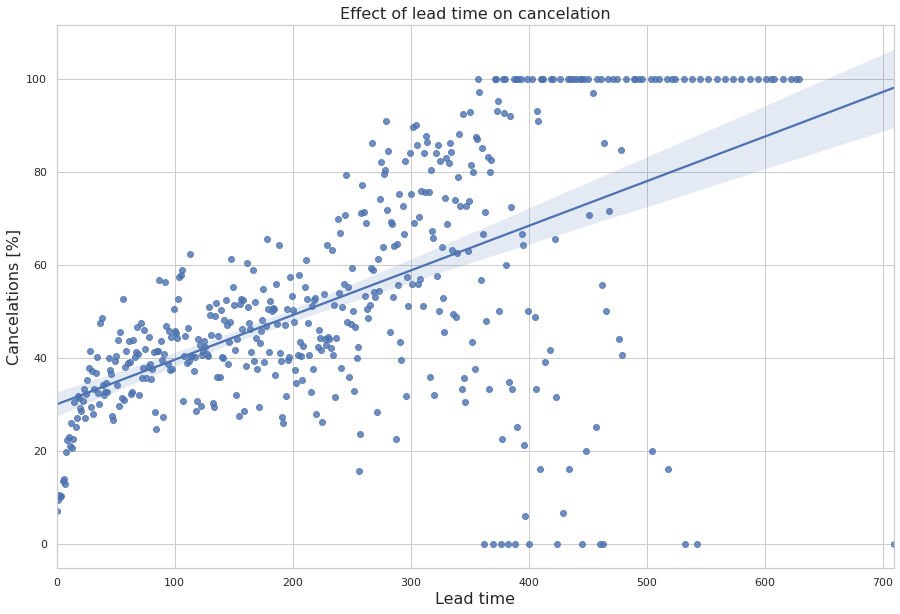

In [ ]:
# Regplot showing relation between lead time and cancellation.

lead_time_df = hotel_df.groupby('lead_time')['is_canceled'].describe()
plt.figure(figsize=(15, 10))
sns.regplot(x=lead_time_df.index, y=lead_time_df["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

## From above plot it is clear that as lead time increases, percentage of booking cancellation also increases.

# Q10. How does deposit type affects cancelation?

Text(0, 0.5, 'Cancelations [%]')

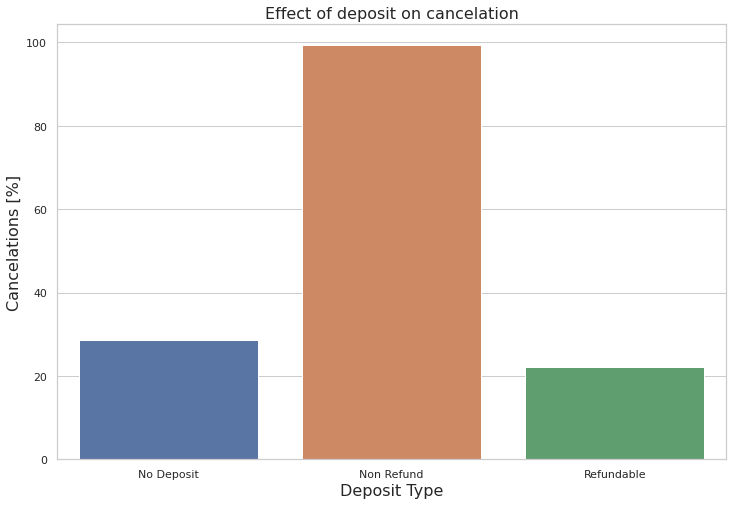

In [ ]:
# Barplot to show which deposit type affects cancellation more.

deposit_df = hotel_df.groupby('deposit_type')['is_canceled'].describe()
plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_df.index, y=deposit_df["mean"].values * 100)
plt.title("Effect of deposit on cancelation", fontsize=16)
plt.xlabel("Deposit Type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)

## 'Non-Refund' policy increases the chances of booking cancellations.

# Q11. How does ADR affect cancelation?

(0.0, 100.0)

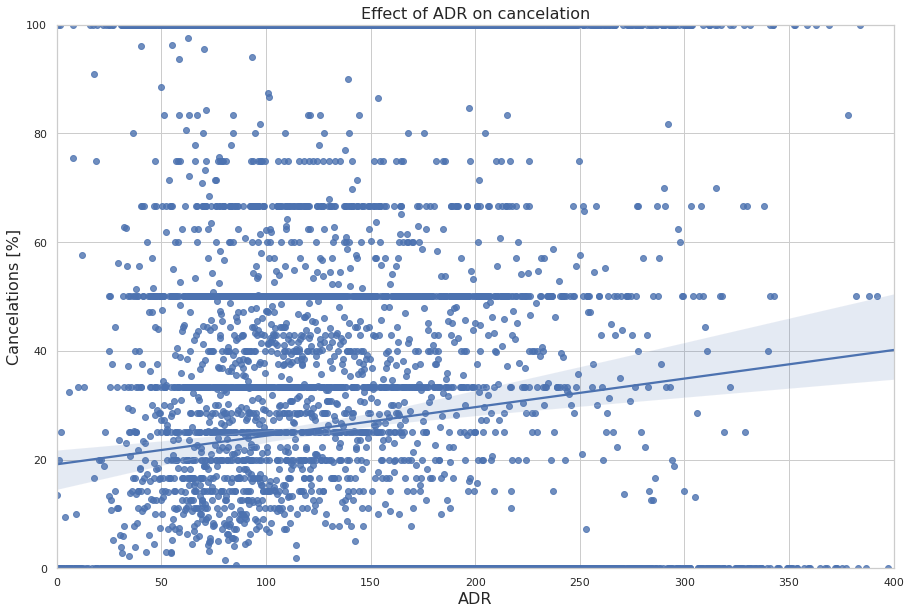

In [ ]:
# Regplot showing relationship between ADR and cancellation.

adr_cancel_data = hotel_df.groupby("adr")["is_canceled"].describe()
plt.figure(figsize=(15, 10))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100)
plt.title("Effect of ADR on cancelation", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)

## The correlation between ADR and cancellations is positive which means as ADR increases number of booking cancellations will also be increases.

# 4. Drawing Conclusions

## 1. Majority of the hotels booked are city hotel.
## 2. Non-Refund policies lead to a higher cancellation rates.
## 3. Target months between May to Aug. Those are peak months due to the summer period.
## 4. Majority of the guests are from Western Europe. So target this area for advertisements.
## 5. Since there are very few repeated guests, focus should be on retaining the customers after their first visit.
## 6. Increase in lead time increases the rate of cancellation.
## 7. Increase in ADR also increases the rate of cancellation.
## 8. Customer should do their booking in during the month November to January because in these months both hotels have cheaper average daily rate.
## 9. Number of booking is greater in case of couples so hotels should focus on special requests made by couple.